## 1- Implement Logistic Regression from scratch - Python (5 Marks)
Ref: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
#Defining the logistic regression sigmoid function
def sigmoid(x): 
  return 1 / (1 + np.exp(-x))

class logistic_regression():

  def factors(self,learn_rate,num_of_iterate):
       self.learn_rate=learn_rate
       self.num_of_iterate=num_of_iterate

  def fit_Logistic_reg(self,x,y):    
    self.theta = np.zeros(x.shape[1])
    self.b=0

    for i in range(self.num_of_iterate):
       
        z = np.dot(x, self.theta)+self.b
        self.theta -= self.learn_rate * ((np.dot(x.T, (sigmoid(z) - y)) ) / len(x))
        self.b -= self.learn_rate * ((np.sum(sigmoid(z)-y))/len(x))

    return self.theta,self.b

  def predict(self,x):
    z = np.dot(x, self.theta)+self.b
    predicted = [0 if i<=0.5 else 1 for i in sigmoid(z)]

    return predicted


## 2- (5 Marks)
In this task, you'll be working with the heart attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

   * Propose at least 2 questions about the dataset. 
   * Use visualizations and relations between variables to support your analysis in answering these questions. 
   * Perform any necessary cleaning steps. 
   * Fit a logistic regression model. 
   * Report model performance.
   * iscuss your findings and observations. 
   * scuss dataset limitations. 
   * organize yhe notebooks with detailed analysis and logical flow of conclusions.
   * Evaluate your logistic regression model.
   * Comment on each score and indicate whether or not you think the used metric is suitable for this particular problem. 


In [45]:
Heart= pd.read_csv("heart.csv")

In [46]:
Heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
Heart.drop_duplicates(inplace = True)

In [48]:
Heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Proposed Questions

##Question One
Relationship between age and different heart attack reasons

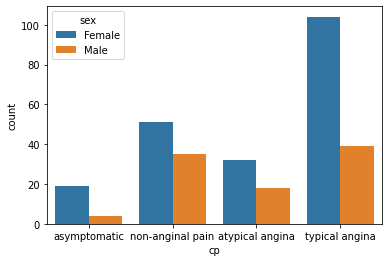

In [49]:
df_copy=Heart.copy()
columns_of_interest= { "sex": {0: "Male",1: "Female"},
                      "cp": {0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"}}
df_copy = df_copy.replace(columns_of_interest)
sns.countplot(x = 'cp',data = df_copy, hue = 'sex')

From the previous plot it can be shown that females are more prone to the four types of diseases with the highest probability of disease to the "typical angina"

##Question Two
Relationship between age and target, where target: 0= less chance of heart attack 1= more chance of heart attack

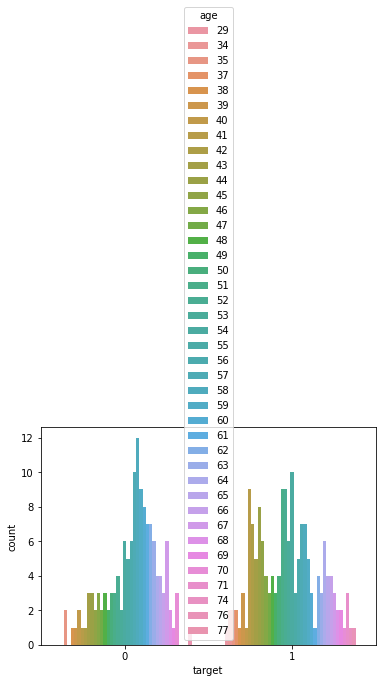

In [50]:
sns.countplot(x = 'target',data = Heart, hue = 'age')

#Logistic Model

In [51]:
y = Heart['target']
X = Heart.drop('target',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 80, shuffle=True)

log_reg = logistic_regression()
log_reg.factors(0.04,1000)
log_reg.fit_Logistic_reg(X_train,y_train)
Y_predict=log_reg.predict(X_test)
acc=accuracy_score(y_test,Y_predict)
print("Accuracy: ", acc*100)
##accuracy changes when changing the random state,test size, learning rate and number of itirations
print("Confusion matrix: ",confusion_matrix(y_test, Y_predict))
print("Classification report:")
print(classification_report(y_test, Y_predict))

<ipython-input-44-3027e4f1da3e>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:  53.84615384615385
Confusion matrix:  [[34  1]
 [41 15]]
Classification report:
              precision    recall  f1-score   support

           0       0.45      0.97      0.62        35
           1       0.94      0.27      0.42        56

    accuracy                           0.54        91
   macro avg       0.70      0.62      0.52        91
weighted avg       0.75      0.54      0.49        91



F1 score is the best to be used as it is a combination of both percision and recall